# EDA Introduction

Good day! We are the __Dadris__ <3

This notebook serves as the collation of our exploratory data analysis for our study, _The Regional Crime Puzzle: Analyzing Poverty and Employment as Predictors of Crime Rates in the Philippines_.

# Data Preprocessing

As we are dealing with employment, poverty, and crime rate percentages across the Philippine regions, we need to clean and preprocess them separately. In doing so, we ensure the integrity of our data and thus our results & findings at the end of the study! As we already have our unified data set under _./data/main.csv_, we shall dissect this to confirm that our data remains consistent with discussions in the data's nature.

## Import Libraries

In [3001]:
%pip install scikit-learn
%pip install statsmodels

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, zscore, pearsonr, spearmanr, levene, mannwhitneyu, ttest_ind
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.colors import ListedColormap

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Loading the unified data set (.csv)

The _./data/main.csv_ file contains the unified data set, which contains:

1. Poverty dataset - 54 regional samples (sparsity due to quarterly collected data; thus only 2018, 2021, 2023 poverty statistics available)

2. Employment dataset - 102 regional samples (complete from 2018 to 2023)

3. Crime rate dataset - 112 regional samples (complete from 2018 to 2023 & 2025; lacks 2019 & 2024 i.e., no available open-sourced data)

In [3002]:
# unified_df will hold the unified dataset (./data/main.csv)
unified_df = pd.read_csv('./data/main.csv')

## Data Understanding and Exploration

Let us first look further at the surface information regarding the unified dataset.

In [3003]:
print(unified_df.shape)
unified_df.head(10)

(119, 24)


,year,region,population_estimate_15_over,population_standard_error,population_cov,labor_force_estimate,labor_force_standard_error,labor_force_cov,labor_force_participation_rate_estimate,labor_force_participation_rate_standard_error,...,poverty_urban_cov,poverty_urban_standard_error,poverty_rural,poverty_rural_cov,poverty_rural_standard_error,index_crime,index_crime_clear,nonindex_crime,nonindex_crime_clear,crime_sovled_total
0,2018,ncr,"9,186",NaN,NaN,"5,538",NaN,NaN,60.3,NaN,...,11.77,36.67,NaN,NaN,NaN,"14,650","11,105","130,419","120,192","38,216"
1,2018,car,"1,270",NaN,NaN,786,NaN,NaN,61.9,NaN,...,17.98,4.56,188.93,5.59,10.56,"1,159",836,"6,021","4,996","2,349"
2,2018,1,"3,520",NaN,NaN,"2,172",NaN,NaN,61.7,NaN,...,26.23,17.90,441.72,10.04,44.36,"2,910","2,005","28,320","26,397","16,012"
3,2018,2,"2,403",NaN,NaN,"1,535",NaN,NaN,63.9,NaN,...,23.09,17.54,503.16,6.73,33.87,"2,389","2,052","9,197","8,921","4,541"
4,2018,3,"7,889",NaN,NaN,"4,722",NaN,NaN,59.9,NaN,...,9.93,39.42,440.84,9.02,39.75,"6,688","5,398","36,315","33,340","15,760"
5,2018,4a,"10,096",NaN,NaN,"6,328",NaN,NaN,62.7,NaN,...,11.09,56.41,603.26,9.99,60.29,"8,312","6,350","38,741","34,492","22,033"
6,2018,4b,"2,093",NaN,NaN,"1,298",NaN,NaN,62.0,NaN,...,15.58,18.87,348.16,7.15,24.89,"1,427","1,210","5,368","4,931","4,511"
7,2018,5,"4,113",NaN,NaN,"2,503",NaN,NaN,60.9,NaN,...,15.69,34.90,"1,413.47",4.22,59.71,"4,934","2,519","20,501","16,915","8,099"
8,2018,6,"5,459",NaN,NaN,"3,343",NaN,NaN,61.2,NaN,...,17.94,9.13,601.72,7.05,42.42,"5,030","3,783","22,870","19,277","11,466"
9,2018,7,"5,295",NaN,NaN,"3,248",NaN,NaN,61.3,NaN,...,12.85,41.50,671.88,8.48,56.98,"13,637","7,155","50,780","42,160","26,750"


Ooo, a lot of NaNs... Apart from these, let's examine other surface information by describing the dataset!

In [3004]:
unified_df.describe()

,year,population_standard_error,population_cov,labor_force_standard_error,labor_force_cov,labor_force_participation_rate_estimate,labor_force_participation_rate_standard_error,labor_force_participation_rate_standard_error_cov,employment_rate,unemployment_rate,poverty_urban,poverty_urban_cov,poverty_urban_standard_error,poverty_rural_cov,poverty_rural_standard_error
count,119.000000,34.000000,34.000000,34.000000,34.000000,102.000000,34.000000,34.000000,102.000000,102.000000,51.000000,51.000000,51.000000,48.000000,48.000000
mean,2021.142857,172.270794,3.926111,115.300029,4.072136,62.813451,0.504794,0.767744,94.161765,5.842157,315.407647,12.807451,33.489804,6.791250,46.195417
std,2.240935,104.880969,0.574592,66.839917,0.584994,4.010435,0.109613,0.156883,2.363042,2.364985,223.443443,5.006442,20.298922,2.146467,17.668980
min,2018.000000,43.132000,2.477922,29.093000,2.510872,46.500000,0.261000,0.417687,86.600000,2.400000,22.570000,6.100000,4.040000,3.980000,8.350000
25%,2019.000000,111.134000,3.700297,82.289500,3.861007,60.825000,0.467000,0.704219,93.250000,4.100000,124.935000,9.270000,18.695000,5.065000,34.897500
50%,2021.000000,132.122000,3.817814,93.391500,3.986366,62.700000,0.500500,0.767926,94.800000,5.200000,303.770000,11.000000,28.720000,6.505000,47.430000
75%,2023.000000,212.670250,4.107289,137.612500,4.311947,64.875000,0.558250,0.816755,95.900000,6.775000,458.325000,15.635000,41.255000,8.350000,58.042500
max,2025.000000,483.972000,5.103737,310.758000,5.235626,74.138000,0.843000,1.267383,97.600000,13.400000,899.270000,26.260000,87.610000,11.850000,94.010000


Moreover, let's check the dataframe's structure and memory usage by examining its info!

In [3005]:
unified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   year                                               119 non-null    int64  
 1   region                                             119 non-null    object 
 2   population_estimate_15_over                        102 non-null    object 
 3   population_standard_error                          34 non-null     float64
 4   population_cov                                     34 non-null     float64
 5   labor_force_estimate                               102 non-null    object 
 6   labor_force_standard_error                         34 non-null     float64
 7   labor_force_cov                                    34 non-null     float64
 8   labor_force_participation_rate_estimate            102 non-null    float64
 9   labor_forc

As shown from the info, there are no null columns and memory usage is light so we're all good on this aspect!

On the other hand, since there are a lot of NaNs upon inspecting unified_df's head, it wouldn't hurt to check ALL of the null entries in our dataset (as expected from the nature of our data)!

In [3006]:
unified_df.isnull().sum()

year                                                  0
region                                                0
population_estimate_15_over                          17
population_standard_error                            85
population_cov                                       85
labor_force_estimate                                 17
labor_force_standard_error                           85
labor_force_cov                                      85
labor_force_participation_rate_estimate              17
labor_force_participation_rate_standard_error        85
labor_force_participation_rate_standard_error_cov    85
employment_rate                                      17
unemployment_rate                                    17
poverty_urban                                        68
poverty_urban_cov                                    68
poverty_urban_standard_error                         68
poverty_rural                                        71
poverty_rural_cov                               

Phew! That's a lot of null entries... what about the data types of each column?

In [3007]:
unified_df.dtypes

year                                                   int64
region                                                object
population_estimate_15_over                           object
population_standard_error                            float64
population_cov                                       float64
labor_force_estimate                                  object
labor_force_standard_error                           float64
labor_force_cov                                      float64
labor_force_participation_rate_estimate              float64
labor_force_participation_rate_standard_error        float64
labor_force_participation_rate_standard_error_cov    float64
employment_rate                                      float64
unemployment_rate                                    float64
poverty_urban                                        float64
poverty_urban_cov                                    float64
poverty_urban_standard_error                         float64
poverty_rural           

Okay, it seems like on the surface, the main issues we have are (1) datatype conversion (entries should be numerical) and (2) the absence of some entries (as expected due to open-source data unavailability).

Let's get a sleek look on the plot of absent entries as follows (note that the color _yellow_ would mark the absent entries!):

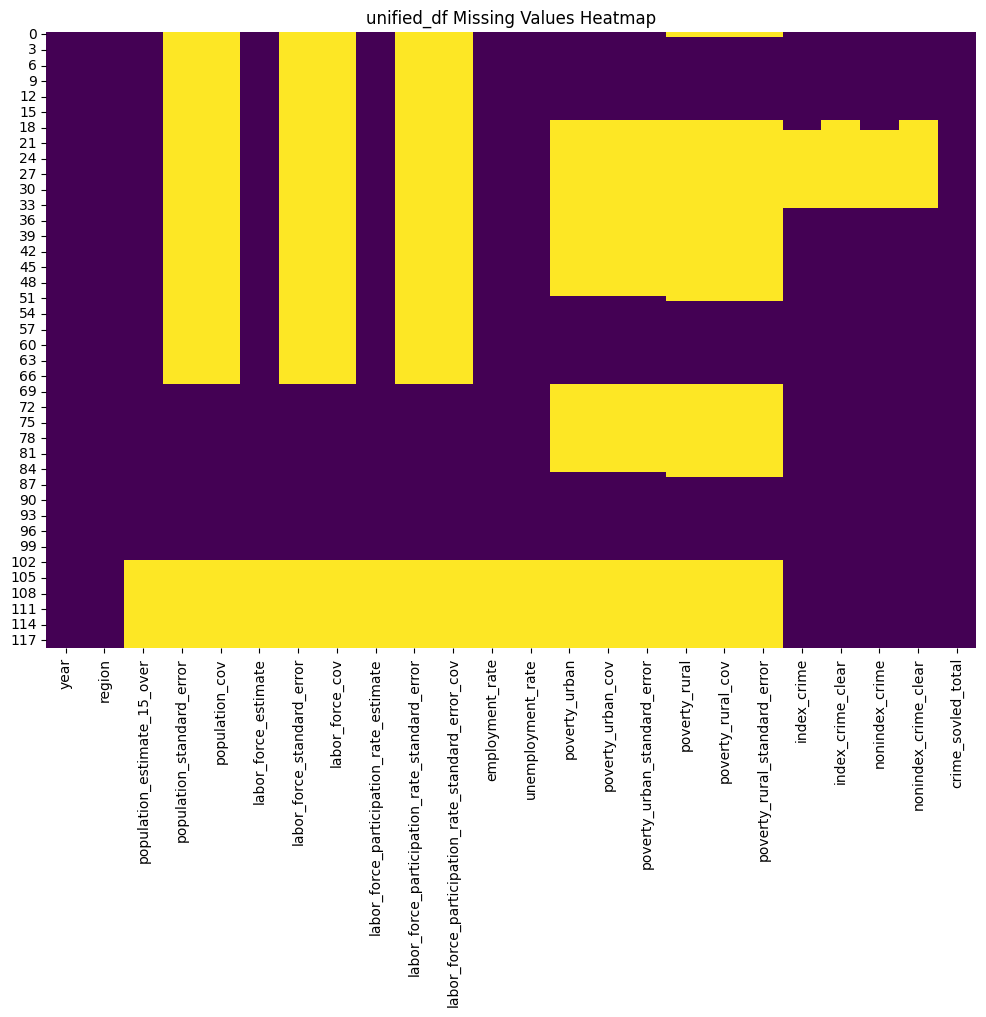

In [3008]:
plt.figure(figsize=(12,8))
sns.heatmap(unified_df.isnull(), cbar=False, cmap='viridis')
plt.title('unified_df Missing Values Heatmap')
plt.show()

From all of these, we could see that the dataset has 119 rows and 24 columns. More so, the missing observations/rows' amount is consistent as to what was expected due to the inavailability of specific open-sourced datasets, particulary in poverty and crime rates. Also, some columns are objects instead of integers/floats, so we must convert those accordingly, i.e., `population_estimate_15_over`, `labor_force_estimate`, `poverty_rural`, `index_crime`, `index_crime_clear`, `nonindex_crime`, `nonindex_crime_clear`, and `crime_sovled_total`. Apart from these, some columns may be extraneous to our study, so we can omit those and create a better & reinforced unified dataset. This reinforced dataset would be the dataset to be used for further exploration & the basis of conclusive claims in our study!

## Data Preparation

Time to cook our reinforced unified dataset!

### a. Data Conversion to reinforced dataset (initial Cleaning & Reduction)

In [3009]:
cols_to_convert = [
    'population_estimate_15_over',
    'labor_force_estimate',
    'poverty_rural',
    'index_crime',
    'index_crime_clear',
    'nonindex_crime',
    'nonindex_crime_clear',
    'crime_sovled_total',
]

# Clean up commas and convert to numeric since entries may have commas (i.e., "1,000" to 1000)
for col in cols_to_convert:
    unified_df[col] = (
        unified_df[col]
        .astype(str)                        # make sure they're strings
        .str.replace(',', '', regex=False)  # remove commas
        .str.replace(' ', '', regex=False)  # remove any stray spaces
    )
    unified_df[col] = pd.to_numeric(unified_df[col], errors='coerce')

# Dropping extraneous columns; these columns are either redundant or not useful for our analysis
cols_to_drop = ['population_standard_error', 
                'population_cov',
                'labor_force_estimate',
                'labor_force_standard_error',
                'labor_force_cov',
                'labor_force_participation_rate_estimate',
                'labor_force_participation_rate_standard_error',
                'labor_force_participation_rate_standard_error_cov',
                'poverty_urban_cov',
                'poverty_urban_standard_error',
                'poverty_rural_cov',
                'poverty_rural_standard_error',
                'index_crime_clear', 
                'nonindex_crime_clear'
                ]

# Renaming columns for better clarity (e.g., 'crime_sovled_total' to 'total_crime_solved')
unified_df.rename(columns={'crime_sovled_total': 'total_crime_solved'}, inplace=True)

# Creating the reinforced dataset by dropping the extraneous columns
reinforced_df = unified_df.drop(columns=cols_to_drop)

# Displaying the shape and data types of the reinforced dataset
print("Reinforced DataFrame Shape (reinforced_df):", reinforced_df.shape)
reinforced_df

Reinforced DataFrame Shape (reinforced_df): (119, 10)


,year,region,population_estimate_15_over,employment_rate,unemployment_rate,poverty_urban,poverty_rural,index_crime,nonindex_crime,total_crime_solved
0,2018,ncr,9186.0,93.4,6.6,311.53,NaN,14650.0,130419.0,38216
1,2018,car,1270.0,95.9,4.1,25.37,188.93,1159.0,6021.0,2349
2,2018,1,3520.0,93.2,6.8,68.25,441.72,2910.0,28320.0,16012
3,2018,2,2403.0,97.0,3.0,75.98,503.16,2389.0,9197.0,4541
4,2018,3,7889.0,94.2,5.8,397.07,440.84,6688.0,36315.0,15760
...,...,...,...,...,...,...,...,...,...,...
114,2025,10,NaN,NaN,NaN,NaN,NaN,1022.0,4006.0,3959
115,2025,11,NaN,NaN,NaN,NaN,NaN,899.0,11462.0,11711
116,2025,12,NaN,NaN,NaN,NaN,NaN,672.0,1949.0,2045
117,2025,13,NaN,NaN,NaN,NaN,NaN,674.0,2497.0,2287


In [3010]:
# Check if types are consistent after conversion
print(f"{reinforced_df.dtypes}")

# Along with this, check if there are any duplicate rows (shouldn't be any in a well-constructed dataset)
print("\nDuplicate check:",  reinforced_df.duplicated().sum())

year                             int64
region                          object
population_estimate_15_over    float64
employment_rate                float64
unemployment_rate              float64
poverty_urban                  float64
poverty_rural                  float64
index_crime                    float64
nonindex_crime                 float64
total_crime_solved               int64
dtype: object

Duplicate check: 0


After dropping irrelevant columns and converting retained columns to a numerical value, we now convert `population_estimate_15_over` to its true value (multiplied by 1000 as said in the collected dataset) so that we can use it as a denominator to calculate poverty and crime rates later (so that scales are consistent, i.e., [0, 100]; also, employment is already up to this scale).

Note that 15-year olds are the baseline permitted workers in the Philippines, which is why they are primarily considered as this study's population. Also, the minimum age of criminal responsibility is 15 years old in the Philippines because of the "Kiko Pangilinan Juvenile Act" :0

With this in mind, 15-year olds as breadwinners = poverty-helpers (relation to poverty rate as they help reduce it with income) & employment-contributors (employment_rate); 15-year olds = criminally accountable


Also, poverty values, i.e., `poverty_urban` and `poverty_rural` should also be converted to its true value (multiplied by 1000 as said in the collected dataset) as well...

In [3011]:
# Convert population_estimate_15_over, poverty_urban, & poverty_rural to their true value by multiplying by 1000
reinforced_df["population_estimate_15_over"] = reinforced_df["population_estimate_15_over"] * 1000
reinforced_df["poverty_urban"] = reinforced_df["poverty_urban"] * 1000
reinforced_df["poverty_rural"] = reinforced_df["poverty_rural"] * 1000

reinforced_df

,year,region,population_estimate_15_over,employment_rate,unemployment_rate,poverty_urban,poverty_rural,index_crime,nonindex_crime,total_crime_solved
0,2018,ncr,9186000.0,93.4,6.6,311530.0,NaN,14650.0,130419.0,38216
1,2018,car,1270000.0,95.9,4.1,25370.0,188930.0,1159.0,6021.0,2349
2,2018,1,3520000.0,93.2,6.8,68250.0,441720.0,2910.0,28320.0,16012
3,2018,2,2403000.0,97.0,3.0,75980.0,503160.0,2389.0,9197.0,4541
4,2018,3,7889000.0,94.2,5.8,397070.0,440840.0,6688.0,36315.0,15760
...,...,...,...,...,...,...,...,...,...,...
114,2025,10,NaN,NaN,NaN,NaN,NaN,1022.0,4006.0,3959
115,2025,11,NaN,NaN,NaN,NaN,NaN,899.0,11462.0,11711
116,2025,12,NaN,NaN,NaN,NaN,NaN,672.0,1949.0,2045
117,2025,13,NaN,NaN,NaN,NaN,NaN,674.0,2497.0,2287


At this point, we have now converted our entries to numerical values for compatibility with succeeding statistical tests. Since our columns are now numerical and cleared, we now proceed to the next preprocessing step: _feature engineering and selection_.

Note that we did this before outlier testing since we might detect outliers in the features we'll be engineering :) In that way, we'll only need to iterate outlier testing once!

### b. Feature engineering and selection

In [3012]:
# Feature engineering: creating total crime and total poverty features
reinforced_df['total_crime'] = reinforced_df[['index_crime','nonindex_crime']].fillna(0).sum(axis=1)
reinforced_df['total_poverty'] = reinforced_df[['poverty_urban','poverty_rural']].sum(axis=1, min_count=1)

# Using population_estimate_15_over as denominator for rate calculations (i like den ;-;)
den = reinforced_df['population_estimate_15_over']

# Calculate rates while handling division by zero and NaN values
rates = {'poverty_urban_rate': 'poverty_urban',
         'poverty_rural_rate': 'poverty_rural',
         'total_poverty_rate': 'total_poverty',
         'index_crime_rate': 'index_crime',
         'nonindex_crime_rate': 'nonindex_crime',
         'total_crime_rate': 'total_crime'}

for rate_col, num_col in rates.items():
    reinforced_df[rate_col] = np.where(
        (den == 0) | (reinforced_df[num_col].isna()),  # if denominator 0 or numerator NaN
        np.nan,                                        # set result to NaN
        (reinforced_df[num_col] / den) * 100           # else calculate rate
    )

# Reposition columns for better readability
cols = reinforced_df.columns.tolist()
new_order = [
    'year', 'region', 'population_estimate_15_over', 'employment_rate',
    'unemployment_rate', 'poverty_urban', 'poverty_rural', 'poverty_urban_rate',
    'poverty_rural_rate', 'total_poverty', 'total_poverty_rate', 'index_crime',
    'nonindex_crime', 'index_crime_rate', 'nonindex_crime_rate', 'total_crime',
    'total_crime_rate', 'total_crime_solved'
]

reinforced_df = reinforced_df[new_order]

reinforced_df.shape

(119, 18)

In [3013]:
reinforced_df.head(16)

,year,region,population_estimate_15_over,employment_rate,unemployment_rate,poverty_urban,poverty_rural,poverty_urban_rate,poverty_rural_rate,total_poverty,total_poverty_rate,index_crime,nonindex_crime,index_crime_rate,nonindex_crime_rate,total_crime,total_crime_rate,total_crime_solved
0,2018,ncr,9186000.0,93.4,6.6,311530.0,NaN,3.391356,NaN,311530.0,3.391356,14650.0,130419.0,0.159482,1.419758,145069.0,1.579240,38216
1,2018,car,1270000.0,95.9,4.1,25370.0,188930.0,1.997638,14.876378,214300.0,16.874016,1159.0,6021.0,0.091260,0.474094,7180.0,0.565354,2349
2,2018,1,3520000.0,93.2,6.8,68250.0,441720.0,1.938920,12.548864,509970.0,14.487784,2910.0,28320.0,0.082670,0.804545,31230.0,0.887216,16012
3,2018,2,2403000.0,97.0,3.0,75980.0,503160.0,3.161881,20.938826,579140.0,24.100707,2389.0,9197.0,0.099417,0.382730,11586.0,0.482147,4541
4,2018,3,7889000.0,94.2,5.8,397070.0,440840.0,5.033211,5.588034,837910.0,10.621245,6688.0,36315.0,0.084776,0.460325,43003.0,0.545101,15760
5,2018,4a,10096000.0,93.4,6.6,508900.0,603260.0,5.040610,5.975238,1112160.0,11.015848,8312.0,38741.0,0.082330,0.383726,47053.0,0.466056,22033
6,2018,4b,2093000.0,95.3,4.7,121060.0,348160.0,5.784042,16.634496,469220.0,22.418538,1427.0,5368.0,0.068180,0.256474,6795.0,0.324654,4511
7,2018,5,4113000.0,95.1,4.9,222460.0,1413470.0,5.408704,34.365913,1635930.0,39.774617,4934.0,20501.0,0.119961,0.498444,25435.0,0.618405,8099
8,2018,6,5459000.0,94.7,5.3,50870.0,601720.0,0.931856,11.022532,652590.0,11.954387,5030.0,22870.0,0.092141,0.418941,27900.0,0.511083,11466
9,2018,7,5295000.0,94.7,5.3,322990.0,671880.0,6.099906,12.688952,994870.0,18.788857,13637.0,50780.0,0.257545,0.959018,64417.0,1.216563,26750


In [3014]:
reinforced_df.columns.tolist()

['year',
 'region',
 'population_estimate_15_over',
 'employment_rate',
 'unemployment_rate',
 'poverty_urban',
 'poverty_rural',
 'poverty_urban_rate',
 'poverty_rural_rate',
 'total_poverty',
 'total_poverty_rate',
 'index_crime',
 'nonindex_crime',
 'index_crime_rate',
 'nonindex_crime_rate',
 'total_crime',
 'total_crime_rate',
 'total_crime_solved']

__Explanation for engineering features above__:

In engineering and integrating relevant features, we ensured the inclusion of poverty and crime rates to account for differences in regional populations, since larger populations may intuitively correspond to higher poverty, crime, and employment figures. 

However, this assumption may not necessarily hold. Therefore, we will examine all relevant features, their values, and the correlations among them—specifically, poverty and employment in relation to crime. 

Beyond testing our main hypotheses regarding the influence of poverty and employment on crime, this approach also allows us to assess whether population size affects these variables.

__Oki, Noice! All features are intact and numerical in nature__ :)

Now, we can proceed to _detecting and handling outliers (if there are any)_! 

### c. Detecting and handling (possible) outliers

But... before that, we must first determine what outlier test would be compatible with our reinforced dataframe. Since our reinforced dataframe's shape is (119, 18), we must utilize outlier tests that are accurate for small-scale data. In our case, we will be using either (or both if applicable) Z-score or IQR testing for outliers.

To know if either is compatible, we run Shapiro-Wilk tests and visualize if our data is normally distributed using a histogram and a Q-Q plot. If our data is not normally distributed, we can't use Z-score and only IQR for outlier detection. Otherwise, we can use both.

#### i.) Shapiro-Wilk Test

Hypothesis (temp H0): `reinforced_df` is normally distributed (p > 0.05)

Alternative (temp HA): `reinforced_df` is not normally distributed (p <= 0.05)

#### ii.) Q-Q Plot

Visually, data is normally distributed if the points closely follow the straight diagonal reference line (45 degree line... if you think about it, its like the "perfect" linear function: f(x) = x)

#### iii.) Histogram

Visually, data is normally distributed if the shape resembles a bell curve, with the majority of the data clustered around the center and tapering off on both sides

Shapiro-Wilk Test for population_estimate_15_over: Statistics=0.8138708720008396, p-value=5.157135051351921e-10
Skewness for population_estimate_15_over: 1.3055383749944731
Kurtosis for population_estimate_15_over: 0.5709608243832056


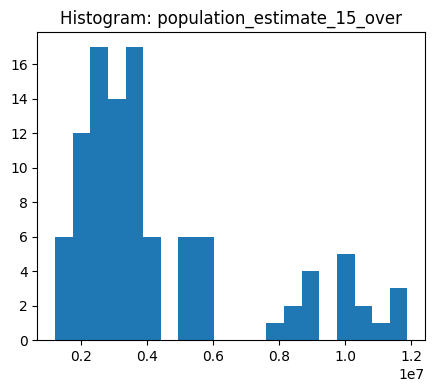

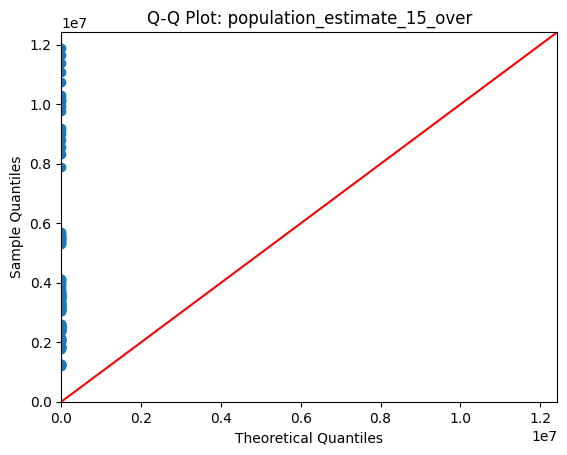

Shapiro-Wilk Test for employment_rate: Statistics=0.8928630175992457, p-value=5.362088006231806e-07
Skewness for employment_rate: -1.2043521462539997
Kurtosis for employment_rate: 1.037768044544514


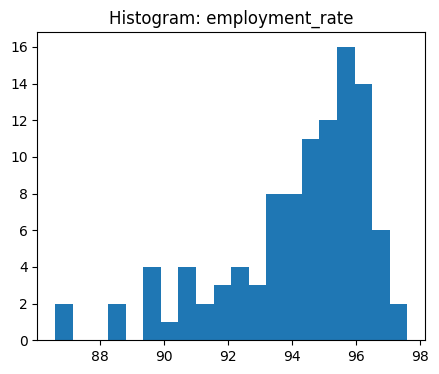

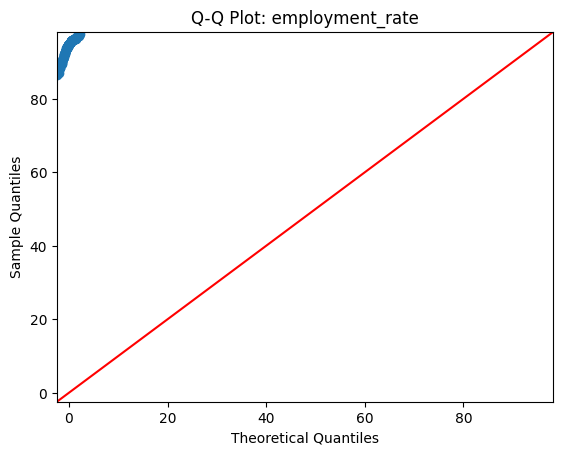

Shapiro-Wilk Test for unemployment_rate: Statistics=0.8934758388983846, p-value=5.719282226032672e-07
Skewness for unemployment_rate: 1.1991917137522823
Kurtosis for unemployment_rate: 1.021349700046914


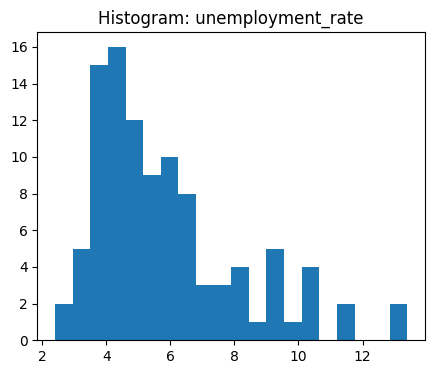

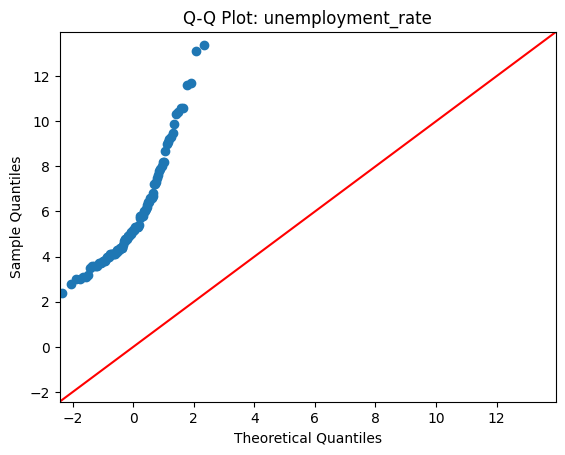

Shapiro-Wilk Test for poverty_urban: Statistics=0.9229177175824256, p-value=0.0026918899725426417
Skewness for poverty_urban: 0.8059058595362396
Kurtosis for poverty_urban: 0.22575001356767954


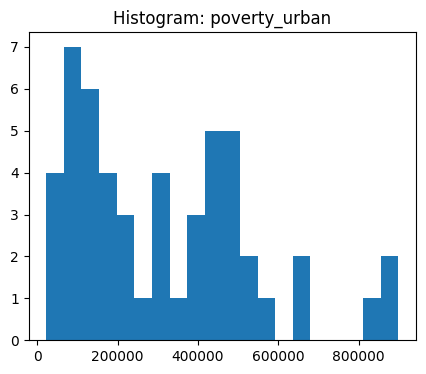

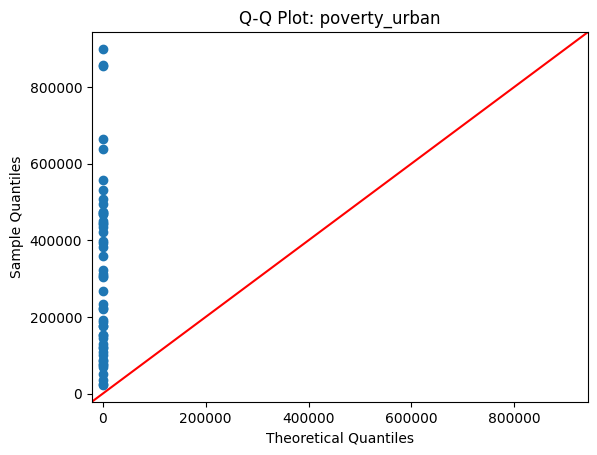

Shapiro-Wilk Test for poverty_rural: Statistics=0.9279086701481309, p-value=0.0057142952893276255
Skewness for poverty_rural: 0.9542314698229061
Kurtosis for poverty_rural: 0.7780459436591936


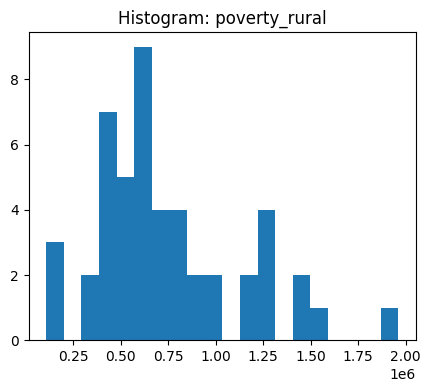

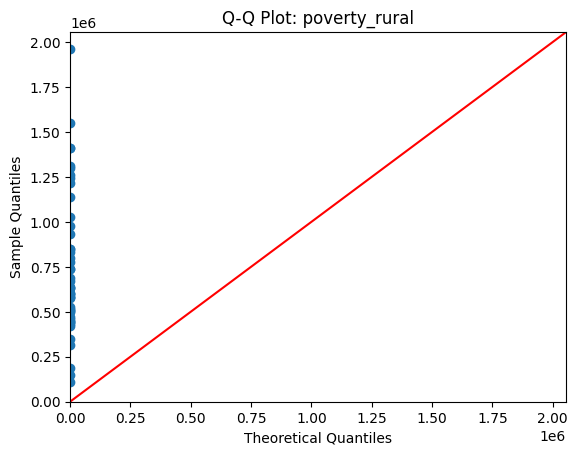

Shapiro-Wilk Test for poverty_urban_rate: Statistics=0.9057185384387725, p-value=0.0006564075500219927
Skewness for poverty_urban_rate: 1.2743654252176337
Kurtosis for poverty_urban_rate: 2.7503326918926585


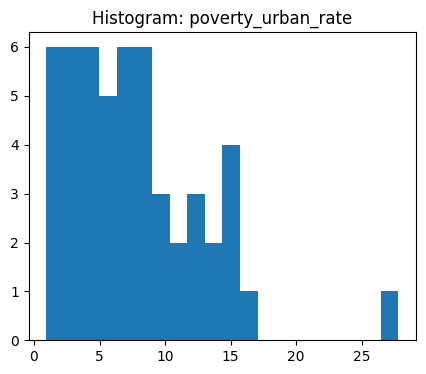

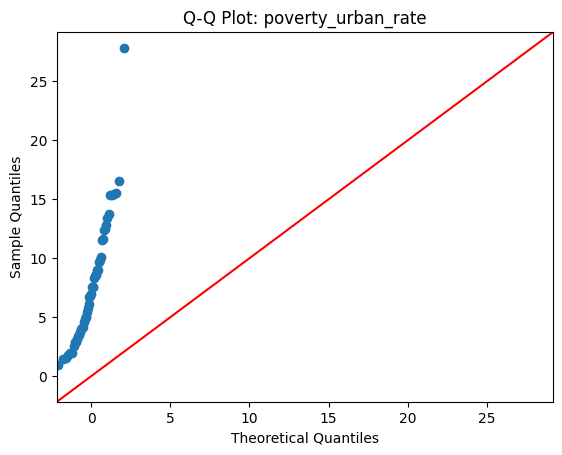

Shapiro-Wilk Test for poverty_rural_rate: Statistics=0.8804138117528707, p-value=0.00015544950075812214
Skewness for poverty_rural_rate: 1.5054768290747174
Kurtosis for poverty_rural_rate: 4.110814526583896


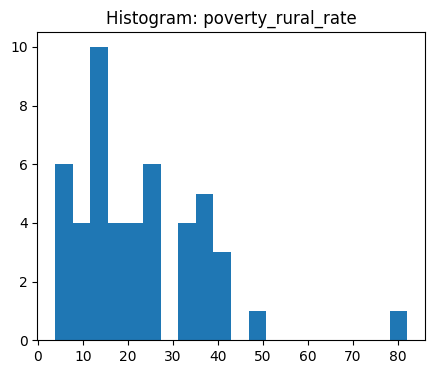

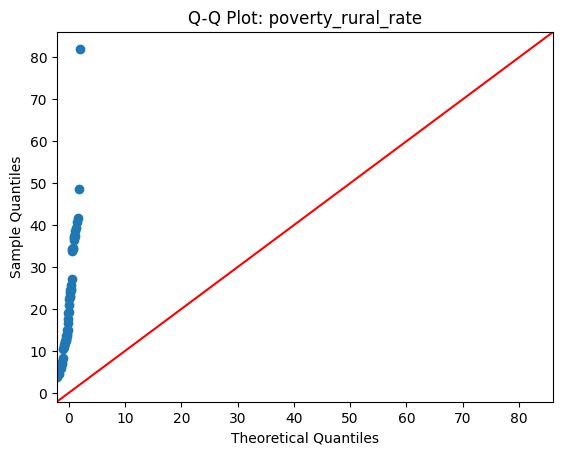

Shapiro-Wilk Test for total_poverty: Statistics=0.9748691952569459, p-value=0.34822079804375056
Skewness for total_poverty: 0.5136707301676493
Kurtosis for total_poverty: 0.6020338430211902


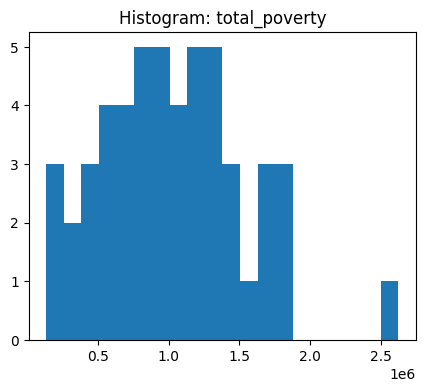

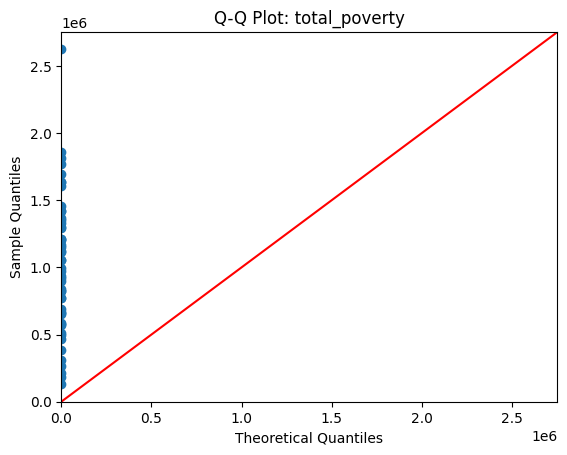

Shapiro-Wilk Test for total_poverty_rate: Statistics=0.8769446289303136, p-value=7.783279463464565e-05
Skewness for total_poverty_rate: 1.6111400058083478
Kurtosis for total_poverty_rate: 5.432607173897505


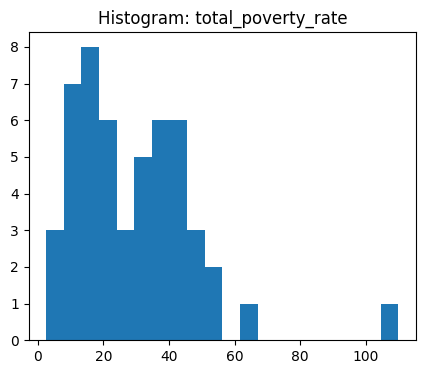

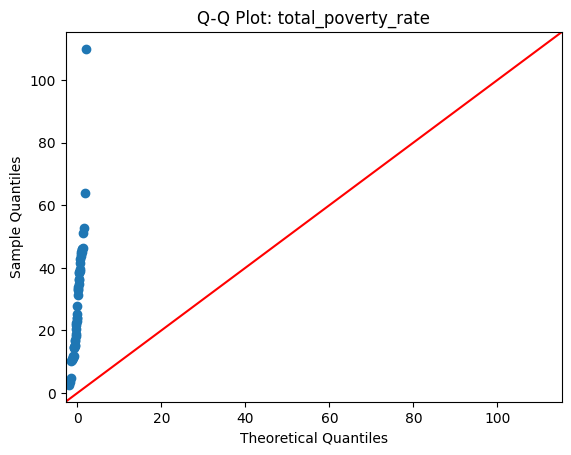

Shapiro-Wilk Test for index_crime: Statistics=0.7203574826792338, p-value=8.816799912399289e-13
Skewness for index_crime: 2.4839604203157846
Kurtosis for index_crime: 7.324654731350481


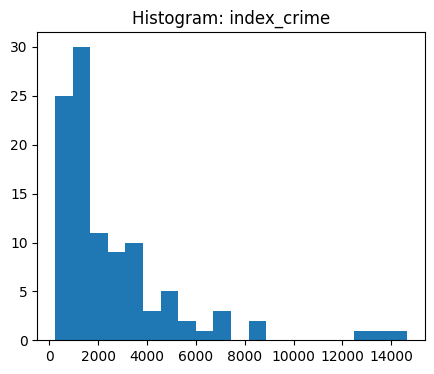

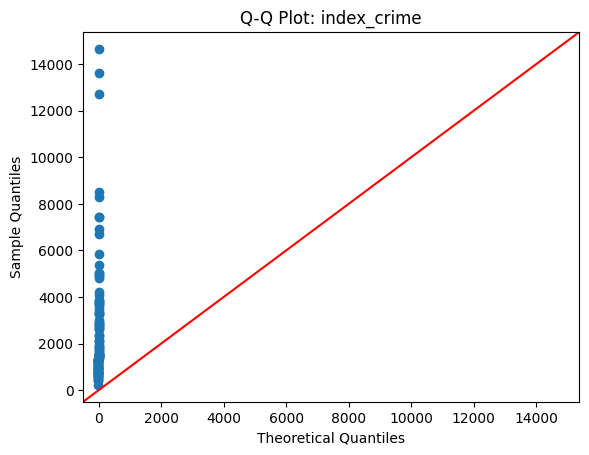

Shapiro-Wilk Test for nonindex_crime: Statistics=0.6018558140991539, p-value=2.298762775426912e-15
Skewness for nonindex_crime: 4.42194317004482
Kurtosis for nonindex_crime: 29.3553016047008


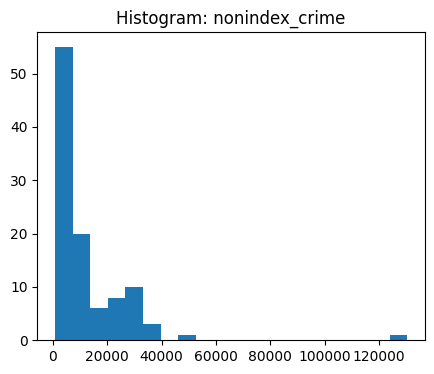

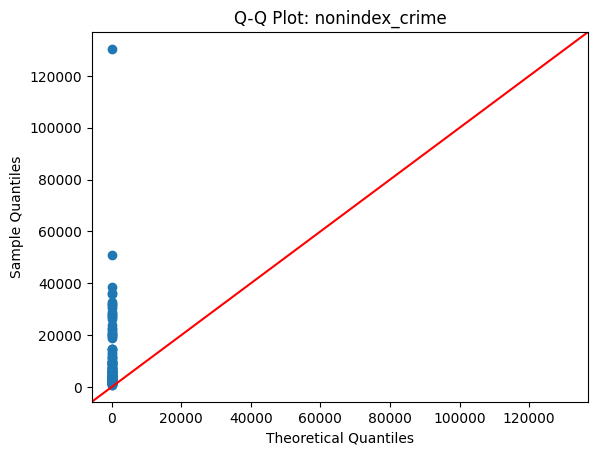

Shapiro-Wilk Test for index_crime_rate: Statistics=0.7648475252708882, p-value=1.7496079502763627e-10
Skewness for index_crime_rate: 2.735985988709586
Kurtosis for index_crime_rate: 11.418029980400735


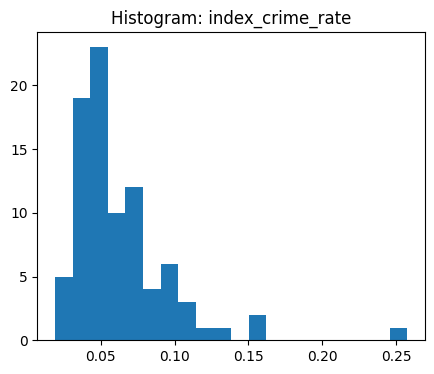

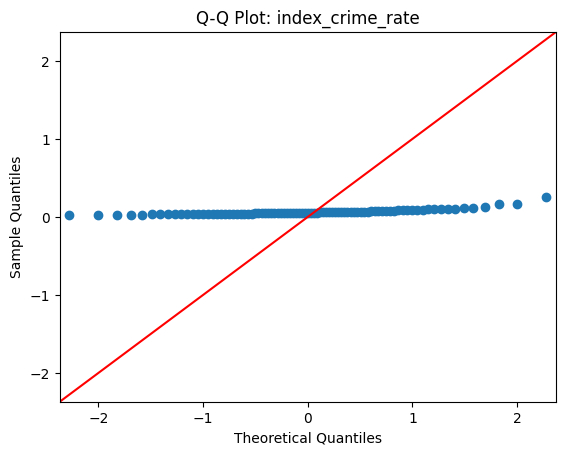

Shapiro-Wilk Test for nonindex_crime_rate: Statistics=0.7430424566261944, p-value=4.897418913002468e-11
Skewness for nonindex_crime_rate: 2.6925284503332474
Kurtosis for nonindex_crime_rate: 10.140734397769133


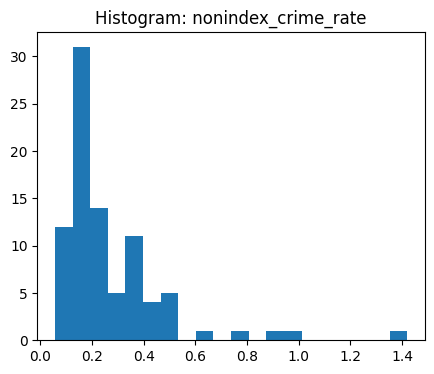

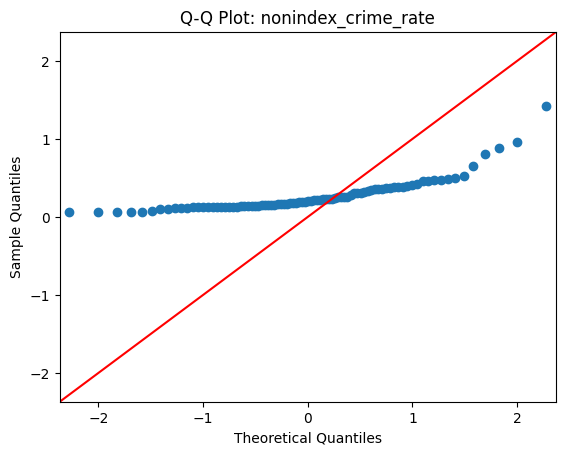

Shapiro-Wilk Test for total_crime: Statistics=0.6336667802897287, p-value=8.461106453640043e-16
Skewness for total_crime: 4.092118661691141
Kurtosis for total_crime: 25.918012191282898


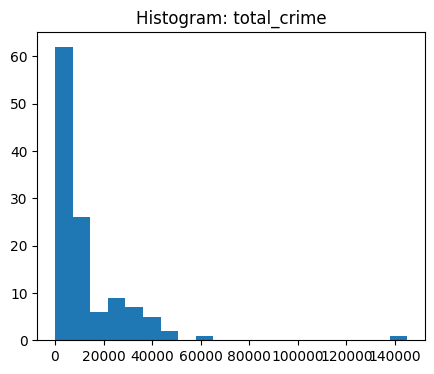

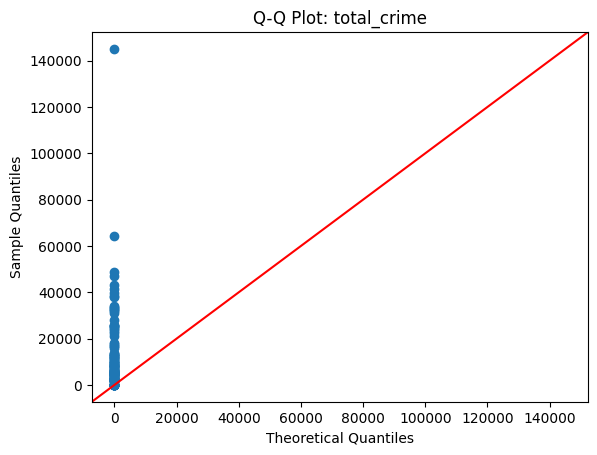

Shapiro-Wilk Test for total_crime_rate: Statistics=0.8209861341213575, p-value=8.834204125269879e-10
Skewness for total_crime_rate: 2.183918351705261
Kurtosis for total_crime_rate: 7.911325835552653


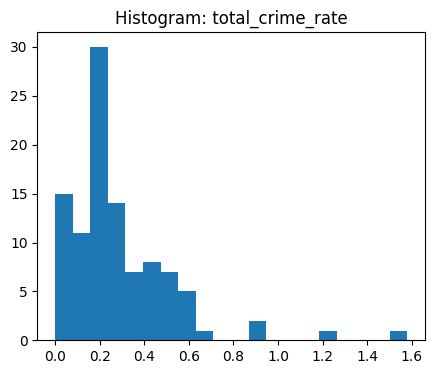

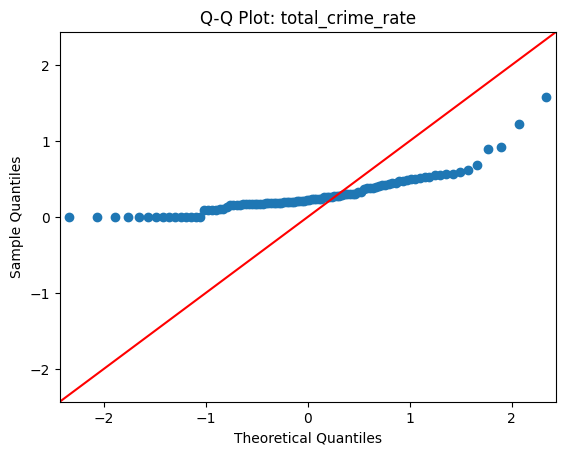

Shapiro-Wilk Test for total_crime_solved: Statistics=0.6820198798961539, p-value=1.0443597201081778e-14
Skewness for total_crime_solved: 3.092000058239091
Kurtosis for total_crime_solved: 13.70485093106988


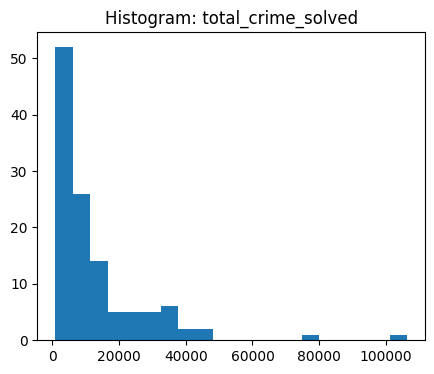

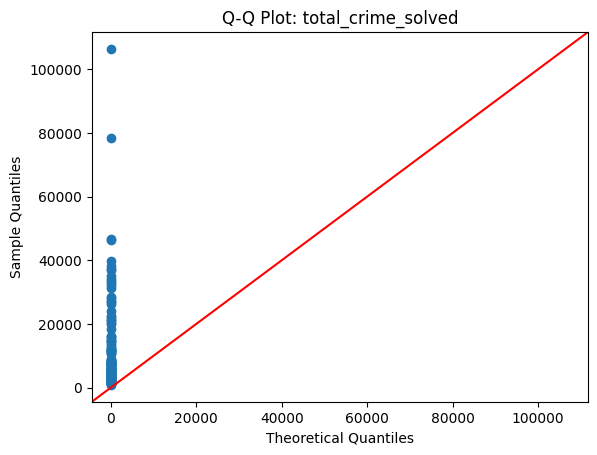

FINAL SUMMARY:
                         Column  Shapiro p-value  Skewness   Kurtosis  \
0   population_estimate_15_over     5.157135e-10  1.305538   0.570961   
1               employment_rate     5.362088e-07 -1.204352   1.037768   
2             unemployment_rate     5.719282e-07  1.199192   1.021350   
3                 poverty_urban     2.691890e-03  0.805906   0.225750   
4                 poverty_rural     5.714295e-03  0.954231   0.778046   
5            poverty_urban_rate     6.564076e-04  1.274365   2.750333   
6            poverty_rural_rate     1.554495e-04  1.505477   4.110815   
7                 total_poverty     3.482208e-01  0.513671   0.602034   
8            total_poverty_rate     7.783279e-05  1.611140   5.432607   
9                   index_crime     8.816800e-13  2.483960   7.324655   
10               nonindex_crime     2.298763e-15  4.421943  29.355302   
11             index_crime_rate     1.749608e-10  2.735986  11.418030   
12          nonindex_crime_rate     

In [3015]:
# Get the list of columns in reinforced_df
reinforced_df_num_cols = reinforced_df.columns.tolist()

# Remove year and region since they are not numerical columns for outlier testing
reinforced_df_num_cols.remove('year')
reinforced_df_num_cols.remove('region')

# Initialize an empty list to store results for outlier test determination (i.e., normal or not?)
results = []

for col in reinforced_df_num_cols:
  data = reinforced_df[col].dropna()  # Drop NaN values for test compatibility

  # ---------- Shapiro-Wilk Test ----------
  stat, p_value = shapiro(data)
  print(f"Shapiro-Wilk Test for {col}: Statistics={stat}, p-value={p_value}")

  skew = data.skew()
  kurtosis = data.kurtosis()

  print(f"Skewness for {col}: {skew}")
  print(f"Kurtosis for {col}: {kurtosis}")

  if p_value > 0.05:
    normality = "Likely normal"
    recommendation = "Use Z-score or IQR for outlier detection"
  else:
    normality = "Not normal"
    recommendation = "Use IQR for outlier detection only"

  # ---------- Histogram ----------
  plt.figure(figsize=(5,4))
  plt.hist(data, bins=20)
  plt.title(f"Histogram: {col}")
  plt.show()

  # ---------- Q-Q Plot ----------
  sm.qqplot(data, line='45')
  plt.title(f"Q-Q Plot: {col}")
  plt.show()

  results.append([col, p_value, skew, kurtosis, normality, recommendation])

# ---------- Summary Table ----------
summary = pd.DataFrame(results, columns=[
    "Column", "Shapiro p-value", "Skewness",
    "Kurtosis", "Normality", "Recommendation"
])

print("FINAL SUMMARY:")
print(summary)
  

Wow! Normality-wise, our data is severely not normally distributed! As per recommendations, only IQR would be compatible for outlier detection due to the nature of our data (i.e., not normally distributed & small-scale) except for the `total_poverty` feature, which was deemed to be _Likely Normal_.

As such, we will now proceed with outlier handling and detection using IQR for all features, then, Z-score testing solely for the `total_poverty` feature!

#### iv.) IQR Testing

In [3016]:
# Since our data is not normally distributed (for all but 1 feature), we will only use IQR for outlier detection:
for col in reinforced_df_num_cols:
  Q1 = reinforced_df[col].quantile(0.25)
  Q3 = reinforced_df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = reinforced_df[(reinforced_df[col] < lower_bound) | (reinforced_df[col] > upper_bound)]

  print(f"\nTotal outliers detected in column '{col}': {outliers.shape[0]}")
  print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
  print(f"\n{outliers[['year', 'region', col]]}\n")


Total outliers detected in column 'population_estimate_15_over': 10
Lower Bound: -1911750.0, Upper Bound: 9836250.0

    year region  population_estimate_15_over
5   2018     4a                   10096000.0
22  2019     4a                   10737000.0
34  2020    ncr                    9938000.0
39  2020     4a                   11097000.0
51  2021    ncr                   10107000.0
56  2021     4a                   11391000.0
68  2022    ncr                   10217109.0
73  2022     4a                   11668264.0
85  2023    ncr                   10320522.0
90  2023     4a                   11891355.0


Total outliers detected in column 'employment_rate': 4
Lower Bound: 89.27499999999999, Upper Bound: 99.87500000000001

    year region  employment_rate
34  2020    ncr             88.3
36  2020      1             86.6
38  2020      3             86.9
39  2020     4a             88.4


Total outliers detected in column 'unemployment_rate': 4
Lower Bound: 0.08749999999999858, Upper Bo

Oof, that’s a lot of outliers. Let’s dissect the outliers of each column and determine if they should be removed for further analysis:

1.) `population_estimate_15_over`

The concerned rows lie in regions NCR and Region IV-A. Since they are the top two (2) most populated regions in the country, it makes sense as to why they lie outside the quantiles. As such, they should be kept in the dataset.

2.) `employment_rate`

Across the four (4) detected outliers, the error margin with the lower bound for IQR only attains an error of around 3% at maximum. Since it isn’t too significant, we can still keep them in the dataset for further analysis.

3.) `unemployment_rate`

Similar to `employment_rate`, the error margin is relatively insignificant, so we keep them.

4.) `poverty_urban`

Whew, no outliers! Perhaps since urban areas have similar economic status :)

5.) `poverty_rural`

Woah, only 1 outlier. It lies in the BARMM region. This makes sense since BARMM is amongst the poorest regions in the Philippines. Crime-wise, despite being a significant outlier, this outlier could possibly be a major contribution to our study’s cause. So, we should keep this outlier in the dataset.

6, 7, 8, 9.) `poverty_urban_rate`, `poverty_rural_rate`, `total_poverty`, `total_poverty_rate`

Uh-oh. Urban, rural, and total poverty rates show only one (1) outlier: `row 16`, which reveals the BARMM region in year 2018. This seems like a data inconsistency since rates should only lie between the [0, 100] range. However, since `total_poverty_rate` exceeds 100 (i.e., ~109% == more poor people than people???), this may be due to a data inconsistency from the collated raw data. From this, we should do mean imputation to maintain temporal and analytical consistency (and since rows related to poverty are already so limited... (3 rows only since years 2018, 2021, and 2023 are available)). We'll handle this in the next code block!

10.) `index_crime`

Across the 8 identified outlier rows, the regions lie in NCR, IV-A, and VII. As they are amongst the top five (5) most populated regions, their `index_crime` insights could contribute massively to our study. So, again, keep them.

11.) `nonindex_crime`

Same sentiment with `index_crime`.

12.) `index_crime_rate`

Max error with ~0.1% range so we can keep the outliers in this feature.

13.) `nonindex_crime_rate`

Average error is ~0.4% and max error only lies in 1 region (~0.8%), which is in NCR, so we should still keep them because we're interested in their insights (+ considering few rows & dense region == NCR)

14.) `total_crime`

Most population-dense regions in the Philippines are seen in the outliers. Hence, keep them since (again) could contribute to successive conclusions.

15.) `total_crime_rate`

Similar sentiment with `total_crime`

16.) `total_crime_solved`

Result of presence in `index_crime` and `nonindex_crime` (i.e., regions with most index and nonindex crimes have the most crime solved - intuitive). So, since the previous two (2) set of outliers were kept, so must this set of outliers.

With those said, before proceeding with resolving `row 16` (region == 'barmm' & year == 2018) as tracked as a consistent & vulnerable outlier from some aforementioned features (`poverty_urban_rate`, `poverty_rural_rate`, `total_poverty`, `total_poverty_rate`), let's do Z-score testing on the `total_poverty` just to ensure consistency and because it was tagged as a `Likely Normal` feature from our Shapiro-Wilk testing earlier :)

#### v.) Z-Score testing (`total_poverty` only)

In [3017]:
col = 'total_poverty'

# Select non-NaN values
data = reinforced_df[col].dropna()

# Compute Z-scores
z_scores = zscore(data)
abs_z_scores = np.abs(z_scores)

# Boolean mask for outliers
outliers_mask = abs_z_scores > 3

# Get indices in the original DataFrame
outlier_indices = data.index[outliers_mask]

# Extract the outlier rows from the original DataFrame
outliers = reinforced_df.loc[outlier_indices]

print(f"Total outliers detected in '{col}': {outliers.shape[0]}")
print(outliers[['year', 'region', col]])

Total outliers detected in 'total_poverty': 1
    year region  total_poverty
16  2018  barmm      2627030.0


In [3018]:
# Check if the row with year==2018 and region=='barmm' matches row index 16
row_index = 16
condition = (reinforced_df['year'] == 2018) & (reinforced_df['region'] == 'barmm')

# Compare the row at index 16 with the filtered condition
is_equal = (reinforced_df.loc[row_index] == reinforced_df.loc[condition].iloc[0]).all()

print(f"Row 16 == (Row: year = 2018 && region = 'barmm')? {is_equal}\n")
reinforced_df[condition]

Row 16 == (Row: year = 2018 && region = 'barmm')? True



,year,region,population_estimate_15_over,employment_rate,unemployment_rate,poverty_urban,poverty_rural,poverty_urban_rate,poverty_rural_rate,total_poverty,total_poverty_rate,index_crime,nonindex_crime,index_crime_rate,nonindex_crime_rate,total_crime,total_crime_rate,total_crime_solved
16,2018,barmm,2390000.0,96.2,3.8,664460.0,1962570.0,27.801674,82.1159,2627030.0,109.917573,926.0,1433.0,0.038745,0.059958,2359.0,0.098703,1181


Woa :O

From our z-score testing on `total_poverty`, we still got the same outlier: `row 16`!

Now, let's do mean imputation to fix row 16 because surely there aren't more poor people than PEOPLE in the BARMM region in 2018, right? Realistically... there wouldn't be 109% of people poor... Also, doing winsorization wouldn't be a smart approach for this because ~2.3 million people, which is the upper bound given by IQR, would equate to about 99-100% of the population of BARMM. Surely, there are people above the poverty margin in the region so this can't be!

Note from IQR:
`Total outliers detected in column 'total_poverty': 1; Lower Bound: -368502.5, Upper Bound: 2367037.5`

On that account, let's proceed to mean imputation.

In [3019]:
# Show 'barmm' rows
reinforced_df[reinforced_df['region'] == 'barmm']

,year,region,population_estimate_15_over,employment_rate,unemployment_rate,poverty_urban,poverty_rural,poverty_urban_rate,poverty_rural_rate,total_poverty,total_poverty_rate,index_crime,nonindex_crime,index_crime_rate,nonindex_crime_rate,total_crime,total_crime_rate,total_crime_solved
16,2018,barmm,2390000.0,96.2,3.8,664460.0,1962570.0,27.801674,82.115900,2627030.0,109.917573,926.0,1433.0,0.038745,0.059958,2359.0,0.098703,1181
33,2019,barmm,2380000.0,93.7,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,1613
50,2020,barmm,2465000.0,91.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,735.0,1605.0,0.029817,0.065112,2340.0,0.094929,1589
67,2021,barmm,2557000.0,90.8,9.3,393170.0,1241590.0,15.376222,48.556512,1634760.0,63.932734,689.0,1818.0,0.026946,0.071099,2507.0,0.098045,1902
84,2022,barmm,2625675.0,94.2,5.8,NaN,NaN,NaN,NaN,NaN,NaN,742.0,1552.0,0.028259,0.059109,2294.0,0.087368,1373
101,2023,barmm,3044974.0,96.4,3.6,468560.0,1138020.0,15.387980,37.373718,1606580.0,52.761698,894.0,1727.0,0.029360,0.056716,2621.0,0.086076,1949
118,2025,barmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,494.0,1334.0,NaN,NaN,1828.0,NaN,1459


In [3020]:
# Only years 2021 and 2023 can be used to calculate mean imputation for 'barmm' in year 2018
# Features that will be imputed include: `poverty_urban`, `poverty_rural`, `poverty_urban_rate`, `poverty_rural_rate`, `total_poverty`, `total_poverty_rate`

imputation_features = [
    'poverty_urban', 'poverty_rural',
    'poverty_urban_rate', 'poverty_rural_rate',
    'total_poverty', 'total_poverty_rate'
]

for feature in imputation_features:
    mean_value = reinforced_df.loc[
        (reinforced_df['region'] == 'barmm') & 
        (reinforced_df['year'].isin([2021, 2023])), feature
    ].mean()
    
    reinforced_df.loc[
        (reinforced_df['region'] == 'barmm') & 
        (reinforced_df['year'] == 2018), feature
    ] = mean_value

reinforced_df[reinforced_df['region'] == 'barmm']

,year,region,population_estimate_15_over,employment_rate,unemployment_rate,poverty_urban,poverty_rural,poverty_urban_rate,poverty_rural_rate,total_poverty,total_poverty_rate,index_crime,nonindex_crime,index_crime_rate,nonindex_crime_rate,total_crime,total_crime_rate,total_crime_solved
16,2018,barmm,2390000.0,96.2,3.8,430865.0,1189805.0,15.382101,42.965115,1620670.0,58.347216,926.0,1433.0,0.038745,0.059958,2359.0,0.098703,1181
33,2019,barmm,2380000.0,93.7,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,1613
50,2020,barmm,2465000.0,91.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,735.0,1605.0,0.029817,0.065112,2340.0,0.094929,1589
67,2021,barmm,2557000.0,90.8,9.3,393170.0,1241590.0,15.376222,48.556512,1634760.0,63.932734,689.0,1818.0,0.026946,0.071099,2507.0,0.098045,1902
84,2022,barmm,2625675.0,94.2,5.8,NaN,NaN,NaN,NaN,NaN,NaN,742.0,1552.0,0.028259,0.059109,2294.0,0.087368,1373
101,2023,barmm,3044974.0,96.4,3.6,468560.0,1138020.0,15.387980,37.373718,1606580.0,52.761698,894.0,1727.0,0.029360,0.056716,2621.0,0.086076,1949
118,2025,barmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,494.0,1334.0,NaN,NaN,1828.0,NaN,1459


In [3021]:
# Last check to ensure that rates "make sense", i.e., lie in the [0, 100] range

rate_cols = ['poverty_urban_rate','poverty_rural_rate','total_poverty_rate',
             'index_crime_rate','nonindex_crime_rate','total_crime_rate']

# max rate per row (ignores NaNs)
max_rate = reinforced_df[rate_cols].max(axis=1)

# counts
print("Rows with any rate >= 100:", (max_rate >= 100).sum())
print("Rows with all rates < 100:", (max_rate < 100).sum())
print("Rows where all rates are NaN:", reinforced_df[rate_cols].isna().all(axis=1).sum())

print(f"{reinforced_df.shape}\n\n")

# print rows with any rate >= 100
print(reinforced_df[max_rate >= 100][['year','region'] + rate_cols])

Rows with any rate >= 100: 0
Rows with all rates < 100: 102
Rows where all rates are NaN: 17
(119, 18)


Empty DataFrame
Columns: [year, region, poverty_urban_rate, poverty_rural_rate, total_poverty_rate, index_crime_rate, nonindex_crime_rate, total_crime_rate]
Index: []


__YEHEYYYYY__

Outlier(s) resolved! Looks like our dataset(s) is preprocessed and good-to-go for analysis. But before that, let's visualize it for one last time just to be perfectly sure.

Afterwards, let's save it :)

### IN CONSTRUCTION: (d.???) Normalizing/standardizing the reinforced dataset

In [3022]:
# On hold at the moment since we may want to use both standardized and non-standardized data for different models
# Standardizing the reinforced dataset using StandardScaler

"""
cols_to_scale = [
    'population_estimate_15_over', 'employment_rate', 'unemployment_rate',
    'poverty_urban', 'poverty_rural', 'index_crime', 'nonindex_crime'
]

scaler = StandardScaler()
standardized_df = reinforced_df.copy()

# Scale only selected columns, but keep DataFrame structure
standardized_df[cols_to_scale] = pd.DataFrame(
    scaler.fit_transform(reinforced_df[cols_to_scale]),
    columns=cols_to_scale,
    index=reinforced_df.index
)

reinforced_df['total_crime'] = reinforced_df['index_crime'] + reinforced_df['nonindex_crime']
reinforced_df['total_poverty'] = reinforced_df['poverty_urban'] + reinforced_df['poverty_rural']

print(standardized_df.head())

# Separate reinforced and standardized dataframes for future models, where needed
# i.e., reinforced_df and standardized_df will be used for different cases; note though that standardized_df is just a scaled version of reinforced_df

"""

"\ncols_to_scale = [\n    'population_estimate_15_over', 'employment_rate', 'unemployment_rate',\n    'poverty_urban', 'poverty_rural', 'index_crime', 'nonindex_crime'\n]\n\nscaler = StandardScaler()\nstandardized_df = reinforced_df.copy()\n\n# Scale only selected columns, but keep DataFrame structure\nstandardized_df[cols_to_scale] = pd.DataFrame(\n    scaler.fit_transform(reinforced_df[cols_to_scale]),\n    columns=cols_to_scale,\n    index=reinforced_df.index\n)\n\nreinforced_df['total_crime'] = reinforced_df['index_crime'] + reinforced_df['nonindex_crime']\nreinforced_df['total_poverty'] = reinforced_df['poverty_urban'] + reinforced_df['poverty_rural']\n\nprint(standardized_df.head())\n\n# Separate reinforced and standardized dataframes for future models, where needed\n# i.e., reinforced_df and standardized_df will be used for different cases; note though that standardized_df is just a scaled version of reinforced_df\n\n"

### d. Visualizing the final dataset(s) to be used

In [3023]:
reinforced_df.shape

(119, 18)

In [3024]:
reinforced_df.columns

Index(['year', 'region', 'population_estimate_15_over', 'employment_rate',
       'unemployment_rate', 'poverty_urban', 'poverty_rural',
       'poverty_urban_rate', 'poverty_rural_rate', 'total_poverty',
       'total_poverty_rate', 'index_crime', 'nonindex_crime',
       'index_crime_rate', 'nonindex_crime_rate', 'total_crime',
       'total_crime_rate', 'total_crime_solved'],
      dtype='object')

In [3025]:
reinforced_df

,year,region,population_estimate_15_over,employment_rate,unemployment_rate,poverty_urban,poverty_rural,poverty_urban_rate,poverty_rural_rate,total_poverty,total_poverty_rate,index_crime,nonindex_crime,index_crime_rate,nonindex_crime_rate,total_crime,total_crime_rate,total_crime_solved
0,2018,ncr,9186000.0,93.4,6.6,311530.0,NaN,3.391356,NaN,311530.0,3.391356,14650.0,130419.0,0.159482,1.419758,145069.0,1.579240,38216
1,2018,car,1270000.0,95.9,4.1,25370.0,188930.0,1.997638,14.876378,214300.0,16.874016,1159.0,6021.0,0.091260,0.474094,7180.0,0.565354,2349
2,2018,1,3520000.0,93.2,6.8,68250.0,441720.0,1.938920,12.548864,509970.0,14.487784,2910.0,28320.0,0.082670,0.804545,31230.0,0.887216,16012
3,2018,2,2403000.0,97.0,3.0,75980.0,503160.0,3.161881,20.938826,579140.0,24.100707,2389.0,9197.0,0.099417,0.382730,11586.0,0.482147,4541
4,2018,3,7889000.0,94.2,5.8,397070.0,440840.0,5.033211,5.588034,837910.0,10.621245,6688.0,36315.0,0.084776,0.460325,43003.0,0.545101,15760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2025,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022.0,4006.0,NaN,NaN,5028.0,NaN,3959
115,2025,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,899.0,11462.0,NaN,NaN,12361.0,NaN,11711
116,2025,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,672.0,1949.0,NaN,NaN,2621.0,NaN,2045
117,2025,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,674.0,2497.0,NaN,NaN,3171.0,NaN,2287


In [3026]:
# standardized_df

__Nice!__ We now have the clean & preprocessed dataset(s) we can use to make conclusions about the correlation of regional poverty & employment to crime rates! Let's save these! After saving, let's get to analyzing...

In [3027]:
reinforced_df.to_csv("./data/reinforced_dataset.csv", index=False)
# standardized_df.to_csv("./data/standardized_dataset.csv", index=False)

# Data Analysis

Recall that we have three (3) approaches to analysis due to the data issues with quarterly-collected regional poverty data and gap years (2019) in the crime rate data. To jog your memory, these include:

(a) __Direct Analysis (Sparse Years)__ - correlation and regression analysis using only the available years (2018, 2021, 2023)

(b) __Tolerance of Gaps__ - treating missing years as gaps without interpolation (acknowledging limited temporal resolution)

(c) __Imputation & Time Series Modeling__ - estimating values for gap years (2019, 2020, 2022) using statistical interpolation and time series forecasting techniques

Before that, we must establish some prerequisites, that is our reinforced dataset along with some helper functions to make our notebook more concise since its already quite long:

With our helper functions on deck, we can now proceed with defining our three (3) approaches for the study...

With prerequisites in check, its time to focus on our three (3) different approaches: